# Titanic Dataset Analysis
### Sayed Malawi

This notebook contains an investigation of a dataset containing survival and demographic information for a subset of the passengers aboard the Titanic. The most obviously compelling question, and the primary focus of this investigation, is whether survival can be correlated to any other variables. Firstly, the data will be loaded into a Pandas DataFrame and cleaned up if necessary. Afterwards, a variety of variables will be inspected to determine their relationships to survival and to each other.

## Preparation

The Titanic data is provided in a CSV file, which can quickly be loaded into a DataFrame for analysis.

In [1]:
import pandas as pd

raw_df = pd.read_csv('titanic-data.csv')
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can view statistics on some of the columns using DataFrame.describe():

In [2]:
raw_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


These statistics provide some initial insights into the numerical columns and dictate potential avenues of further exploration.

Looking at the **count** row, we can see that most of the columns contain information for all 891 passengers, with the exception of the **Age** column. This may necessitate some cleanup to address the missing values. Since describe() can only display statistics for numerical columns, we should check the other columns for missing values as well.

Some information can also be gleaned from the **mean** row. We can see the average survival value was 0.38, indicating that 38% of passengers survived overall, given that a value of 1 corresponds to survival. Furthermore, the average ticket class of 2.31 indicates that most of the passengers purchased cheap, third-class tickets. It might be interesting to see the relationship between ticket class and some of the other variables (especially survival).

Lastly, looking at the **Fare** column, it's interesting that the fare values ranged from 0 all the way up to 512.33, with a mean of 32.20. This seems like another variable that would be worth exploring, although it's probably easier to use the categorical ticket class data with regards to survival.

## Cleaning the data

First, we'll check for missing values in the other columns.

In [3]:
raw_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Checking the counts for each column indicates that besides the missing ages, almost 80% of the cabin data is missing from the dataset. That's pretty unfortunate—it might be better to put off any extensive exploration of the cabin data, and just use it if it ever pops up somewhere interesting. There are also two passengers whose port of embarkment is not accounted for. It might be interesting to look into those specific entries.

In [4]:
raw_df[raw_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Here are the two passengers with missing embarkment data. These two passengers traveled together on the same ticket, so it makes sense that the embarkment information is missing for both. Searching online for these passengers by name leads to a very useful-looking online reference called Encyclopedia Titanica. [Here's the entry for Martha Evelyn Stone.](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html)

The webpage indicates that Stone and her maid Amelie Icard boarded the Titanic together at Southampton. Based on the comprehensiveness of the webpage and a bit of side research on the resource, I chose to trust this information and go ahead with filling in the port of embarkment as 'S'.

In [5]:
fixed_df = raw_df.copy()
fixed_df['Embarked'].fillna(value='S',inplace=True)
fixed_df[fixed_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Now there are no passengers lacking embarkment data. As for the missing ages, we could consider using fillna() to replace the NaN values with the average age across the rest of the dataset, but leaving the NaNs and computing statistics while omitting the missing values should be sufficient for the purposes of this investigation.

## Investigating survival

The data appears to be sufficiently clean to group by survival and begin investigation. This can be done by grouping the dataframe by the values in the survival column.

In [6]:
fixed_df.groupby('Survived').groups

{0: Int64Index([  0,   4,   5,   6,   7,  12,  13,  14,  16,  18,
             ...
             877, 878, 881, 882, 883, 884, 885, 886, 888, 890],
            dtype='int64', length=549),
 1: Int64Index([  1,   2,   3,   8,   9,  10,  11,  15,  17,  19,
             ...
             865, 866, 869, 871, 874, 875, 879, 880, 887, 889],
            dtype='int64', length=342)}

This shows that the dataset contains 549 victims and 342 survivors. It's good to have a significant number from each group to strengthen the validity of any findings.

## Age and sex

One of the categories initially identified as promising was age of the passengers, which can be inspected using describe():

In [7]:
fixed_df.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


It looks like on average, age had almost no effect on survival rate. This is interesting, since one might guess that younger passengers would have a higher chance of being saved during the evacuation than older passengers. Plotting the survival numbers in a histogram with age as the independent variable could yield further insight.

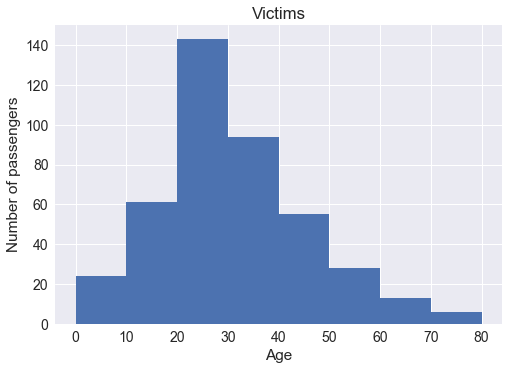

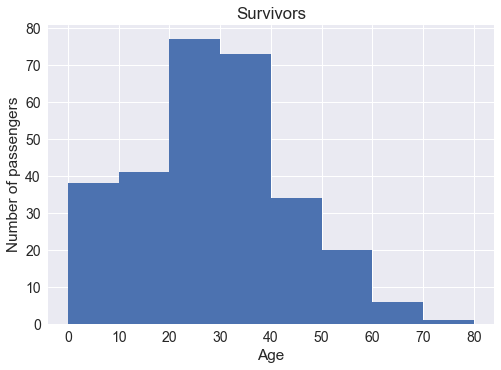

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.4) # Plot font size
title = "Victims"
for i, group in fixed_df.groupby('Survived'):
    hist = group.hist(column='Age', bins=[0,10,20,30,40,50,60,70,80])
    hist[0][0].set_title(title) # hist is a 2D numpy array due to the nature of DataFrame.hist()
    hist[0][0].set_xlabel("Age")
    hist[0][0].set_ylabel("Number of passengers")
    title = "Survivors"

Looking closely, these histograms do provide some clarification as to why the average age is so similar for the two groups. While children under the age of 10 (and to a lesser extent, teenagers) did survive in greater proportions than perish, so did people between the ages of 30 and 40. This finding is somewhat odd; one possible explanation is that parents tended to escape along with their children, and as people in their 30s were the most likely to have young children, their odds of survival increased.

Another characteristic that was theorized to be linked to survival rate was gender. This time, investigation involves grouping by **Sex** and generating statistics for the **Survived** column: 

In [9]:
fixed_df.groupby('Sex')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


Here, the difference is much more stark: 74% of female passengers survived, wheras only 19% of male passengers did. This is in accordance with the "women and children first" policy that was observed during the evacuation.

## Ticket class and port of embarkment

Similarly, the relationship between ticket class and survival rate can be inspected:

In [10]:
fixed_df.groupby('Pclass')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


The passengers with higher-class tickets were significantly more likely to survive: 63% of first-class passengers made it off the boat, while 47% of second-class and just 24% of third-class passengers survived. Although this might be somewhat intuitive depending on one's view of class politics, it's worth thinking a bit about why this is the case. Perhaps lower-class cabins were located on decks further away from the lifeboats. Another theory is that some lower-class ticketholders were non-English speaking emigrants who could not understand the evacuation orders.

Lastly, might the port of embarkment have had any effect on survival rates? It seems unintuitive, but it's easy enough to look into:

In [11]:
fixed_df.groupby('Embarked')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,168.0,0.553571,0.498608,0.0,0.0,1.0,1.0,1.0
Q,77.0,0.389610,0.490860,0.0,0.0,0.0,1.0,1.0
S,646.0,0.339009,0.473740,0.0,0.0,0.0,1.0,1.0


Surprisingly, passengers embarking at Cherbourg had a significantly higher rate of survival—55%, compared to the sub-40% rates for passengers from the other two ports. To analyze why Cherbourg had such a high survival rate, my first inclination was to learn more about the passengers from each port by grouping by port and inspecting other variables. I decided to start with ticket class, since it made some amount of sense that different ports would take on passengers of different economic standing. The results of the groupings can be displayed in bar graphs:

In [12]:
# Convert port identifier to full name
def to_port(letter):
    if letter == 'C':
        return "Cherbourg"
    if letter == 'Q':
        return "Queenstown"
    if letter == 'S':
        return "Southampton"
    
series = []
idx = 0

# Generate Pandas series of ticket class counts for each port
for i, group in fixed_df.groupby('Embarked'):
    series.append((pd.Series(group['Pclass'].value_counts(), name=to_port(i))))
    idx += 1
    
# Combine port ticket counts into a DataFrame
tickets_by_port = pd.concat([series[0], series[1], series[2]], axis=1)
tickets_by_port

,Cherbourg,Queenstown,Southampton
1,85,2,129
2,17,3,164
3,66,72,353


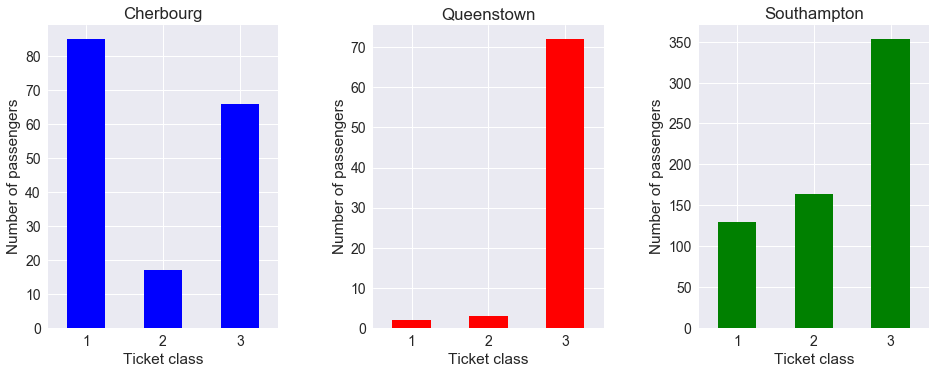

In [13]:
# Subplots are plotted individually in order to display side by side
def plot_subplots(series, axis, my_color):
    plot = series.plot(kind='bar',
                       ax=axis,
                       figsize=[14,5],
                       color=my_color,
                       rot=0
               )
    plot.set_title(series.name)
    plot.set_xlabel("Ticket class")
    plot.set_ylabel("Number of passengers")

# Configure axis and layouts for subplots
fig, axs = plt.subplots(1,3)
plt.tight_layout()

# Plot each subplot
plot_subplots(tickets_by_port['Cherbourg'], axs[0], 'b')
plot_subplots(tickets_by_port['Queenstown'], axs[1], 'r')
plot_subplots(tickets_by_port['Southampton'], axs[2], 'g')

Here, we can see that Cherbourg passengers were predominantly first- and third-class. Queenstown passengers were almost entirely third-class, and while most of the Southampton passengers also purchased third-class tickets, a significant number purchased first- and second-class tickets.

The high Cherbourg survival rate makes more sense now, given the prior finding that higher-class ticketholders were more likely to survive. However, a new mystery arises in Southampton passengers having the lowest survival rate, despite the not insignificant proportion in first- and second-class cabins. Maybe inspecting another variable against the port of embarkment will yield more information?

In [14]:
# Calculate the proportion of female passengers in a gender series
def gender_ratio(series):
    female = 0.0
    count = 0.0
    for entry in series:
        if entry == 'female':
            female += 1.0
        count += 1.0
    return female / count

fixed_df.groupby('Embarked')['Sex'].apply(gender_ratio)

Embarked
C    0.434524
Q    0.467532
S    0.317337
Name: Sex, dtype: float64

Calculating the proportion of female passengers boarding at each port shows that women were a significant minority at Southampton, which would account for the lower-than-expected survival rate.

Why did so few women board the Titanic at Southampton? To learn a little more about the gender demographics at each port, we can plot histograms across all possible combinations of age and sex against an independent variable, such as age:

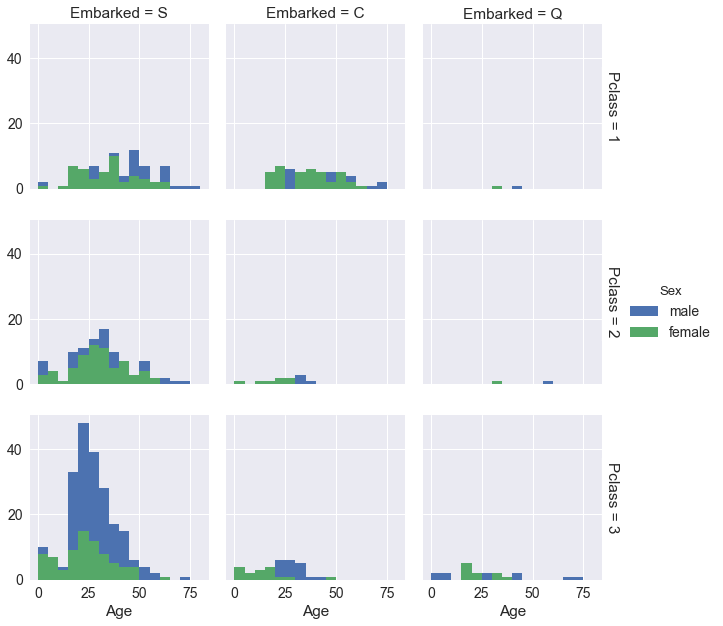

In [17]:
import numpy as np

grid = sns.FacetGrid(fixed_df, row="Pclass", col="Embarked", hue="Sex", size = 3, margin_titles=True)
bins = np.linspace(0, 80, 17) # 17 increments for bin size of 5
grid.map(plt.hist, "Age", bins=bins).add_legend()

The plots indicate that a disproportionately large number of Southampton passengers (the leftmost column of graphs) were men of working age (15-45 years old) holding third-class tickets (the bottom row of graphs), meaning they were likely members of the working class. A quick Google search indicates that the majority of the mostly-male crew set out with the ship at Southampton, which would have strongly swung the working-age gender ratio towards men. However, when a brief manual cross-referencing of part of the crew list was attempted with the names in the dataset, no matches were found. A search for "crew" on the Kaggle discussion forum for the dataset yields several posts claiming that the set only contains passengers, not crew.

If the crew are missing or disproportionately represented in the dataset, a different explanation may be in order. Perhaps many of the Southampton boarders were single men emigrating to the United States seeking new work.

## A final aside

As a last bit of exploration, it would be of interest to look into the passenger(s) who paid the very expensive fare of over 500 pounds, seeing as the average was barely 30, as previously discussed.

In [16]:
fixed_df[fixed_df['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


It looks like three passengers traveled on this ultimate-class ticket. A bit more online searching reveals that Mr. Cardeza was traveling together with his mother (not included in this dataset) and their two servants, Miss Ward and Mr. Lesurer. Judging by the information in [this Time article](http://time.com/money/4283738/titanic-most-expensive-ticket/), the accomodations were very lavish indeed. And as luck would have it, all four members of the entourage made it off the boat.

## Conclusions

Of the variables investigated, those most closely and directly correlated with an increased chance of survival were gender and ticket class. 74% of the female passengers in the dataset survived, as opposed to only 19% of male passengers. Passengers with higher-class tickets also survived in larger proportions; 63% of first-class ticketholders escaped the ship, as opposed to just 24% of third-class passengers. A large number of these third-class passengers were working-age men embarking at Southampton, thought to be Titanic crew or traveling alone in search of work in the United States.

Since the dataset provided contains only a sample of the passengers aboard the Titanic, conclusions from this analysis should be considered with the understanding that there may have been bias (intentional or unintentional) in the selection of the sample. Additionally, while passenger ages were important to the completion of this analysis, age information was missing for about 20% of the passengers. Since the reason for the omission of these ages is unknown, conclusions related to passenger ages should be treated with some scrutiny.